## Importing Data

In [36]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import math 

# 2020 Points

# Outside Of River 
import openpyxl
wb = openpyxl.load_workbook("RiverPoints.xlsx")
wb.get_sheet_names()
sheet=wb.get_sheet_by_name('Sheet1')
east=np.zeros(64)
north=np.zeros(64)

x=2
i=0
while x<=65:
    east[i] = sheet.cell(row=x,column=5).value
    x+=1
    i+=1
x=2
i=0
while x<=65:
    north[i] = sheet.cell(row=x,column=6).value
    x+=1
    i+=1
#print(east)
#print(north)

# Inside of River
import openpyxl
wb = openpyxl.load_workbook("RiverPoints.xlsx")
wb.get_sheet_names()
sheet2=wb.get_sheet_by_name('Sheet2')
east2=np.zeros(72)
north2=np.zeros(72)

x=2
i=0
while x<=73:
    east2[i]=(sheet2.cell(row=x,column=5).value)
    x+=1
    i+=1
x=2
i=0
while x<=73:
    north2[i]=(sheet2.cell(row=x,column=6).value)
    x+=1
    i+=1
#plt.scatter(east,north)
#plt.plot(east2,north2,color='black')
east2=np.concatenate((east2[0:65],east2[68:71]))
north2=np.concatenate((north2[0:65],north2[68:71]))
#plt.scatter(east2,north2)
east=np.concatenate((east[0:46],east[48:64]))
north=np.concatenate((north[0:46],north[48:64]))
#plt.scatter(east2,north2)

C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1652595023.py:13: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  wb.get_sheet_names()
C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1652595023.py:14: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet=wb.get_sheet_by_name('Sheet1')
C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1652595023.py:36: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  wb.get_sheet_names()
C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1652595023.py:37: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet2=wb.get_sheet_by_name('Sheet2')


In [37]:
# Outside Of River 
import openpyxl
wb = openpyxl.load_workbook("RiverPoints.xlsx")
wb.get_sheet_names()
sheet=wb.get_sheet_by_name('Sheet3')
east15=np.zeros(85)
north15=np.zeros(85)

x=2
i=0
while x<=86:
    east15[i] = sheet.cell(row=x,column=5).value
    x+=1
    i+=1
x=2
i=0
while x<=86:
    north15[i] = sheet.cell(row=x,column=6).value
    x+=1
    i+=1
#print(east)
#print(north)

# Inside of River
import openpyxl
wb = openpyxl.load_workbook("RiverPoints.xlsx")
wb.get_sheet_names()
sheet2=wb.get_sheet_by_name('Sheet4')
east215=np.zeros(80)
north215=np.zeros(80)

x=2
i=0
while x<=81:
    east215[i]=(sheet2.cell(row=x,column=5).value)
    x+=1
    i+=1
x=2
i=0
while x<=81:
    north215[i]=(sheet2.cell(row=x,column=6).value)
    x+=1
    i+=1
#print(east2)
#print(north2)

C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1242488096.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  wb.get_sheet_names()
C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1242488096.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet=wb.get_sheet_by_name('Sheet3')
C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1242488096.py:27: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  wb.get_sheet_names()
C:\Users\seanw\AppData\Local\Temp\ipykernel_1804\1242488096.py:28: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet2=wb.get_sheet_by_name('Sheet4')


## Functions to find centre of circle to find outward normal and function to find radius to get curvature

In [38]:
def findCircleh(x1, y1, x2, y2, x3, y3) :
    x12 = x1 - x2;
    x13 = x1 - x3;

    y12 = y1 - y2;
    y13 = y1 - y3;

    y31 = y3 - y1;
    y21 = y2 - y1;

    x31 = x3 - x1;
    x21 = x2 - x1;

    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2);

    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2);

    sx21 = pow(x2, 2) - pow(x1, 2);
    sy21 = pow(y2, 2) - pow(y1, 2);

    f = (((sx13) * (x12) + (sy13) *
        (x12) + (sx21) * (x13) +
        (sy21) * (x13)) // (2 *
        ((y31) * (x12) - (y21) * (x13))));
   
    g = (((sx13) * (y12) + (sy13) * (y12) +
        (sx21) * (y13) + (sy21) * (y13)) //
        (2 * ((x31) * (y12) - (x21) * (y13))));

    c = (-pow(x1, 2) - pow(y1, 2) -
        2 * g * x1 - 2 * f * y1);

    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    h = -g;
    k = -f;
    sqr_of_r = h * h + k * k - c;

    # r is the radius
    r = round(np.sqrt(sqr_of_r), 5);
    return h  

def findCirclek(x1, y1, x2, y2, x3, y3) :
    x12 = x1 - x2;
    x13 = x1 - x3;

    y12 = y1 - y2;
    y13 = y1 - y3;

    y31 = y3 - y1;
    y21 = y2 - y1;

    x31 = x3 - x1;
    x21 = x2 - x1;

    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2);

    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2);

    sx21 = pow(x2, 2) - pow(x1, 2);
    sy21 = pow(y2, 2) - pow(y1, 2);

    f = (((sx13) * (x12) + (sy13) *
        (x12) + (sx21) * (x13) +
        (sy21) * (x13)) // (2 *
        ((y31) * (x12) - (y21) * (x13))));
   
    g = (((sx13) * (y12) + (sy13) * (y12) +
        (sx21) * (y13) + (sy21) * (y13)) //
        (2 * ((x31) * (y12) - (x21) * (y13))));

    c = (-pow(x1, 2) - pow(y1, 2) -
        2 * g * x1 - 2 * f * y1);

    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    h = -g;
    k = -f;
    sqr_of_r = h * h + k * k - c;

    # r is the radius
    r = round(np.sqrt(sqr_of_r), 5);
    return k  

def centre(x,y):
    i=0
    centre=np.empty((len(x)-2,2))
    while(i<len(x)-2):
        x1=x[i]
        x2=x[i+1]
        x3=x[i+2]
        y1=y[i]
        y2=y[i+1]
        y3=y[i+2]
        centre[i,1]=findCirclek(x1, y1, x2, y2, x3, y3)
        centre[i,0]=findCircleh(x1, y1, x2, y2, x3, y3)
        i=i+1
    return centre
def findCircle(x1, y1, x2, y2, x3, y3) :
    x12 = x1 - x2;
    x13 = x1 - x3;

    y12 = y1 - y2;
    y13 = y1 - y3;

    y31 = y3 - y1;
    y21 = y2 - y1;

    x31 = x3 - x1;
    x21 = x2 - x1;

    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2);

    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2);

    sx21 = pow(x2, 2) - pow(x1, 2);
    sy21 = pow(y2, 2) - pow(y1, 2);

    f = (((sx13) * (x12) + (sy13) *
        (x12) + (sx21) * (x13) +
        (sy21) * (x13)) // (2 *
        ((y31) * (x12) - (y21) * (x13))));
    
    g = (((sx13) * (y12) + (sy13) * (y12) +
        (sx21) * (y13) + (sy21) * (y13)) //
        (2 * ((x31) * (y12) - (x21) * (y13))));

    c = (-pow(x1, 2) - pow(y1, 2) -
        2 * g * x1 - 2 * f * y1);

    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    h = -g;
    k = -f;
    sqr_of_r = h * h + k * k - c;

    # r is the radius
    r = round(np.sqrt(sqr_of_r), 5);
    return r
    

def curve(x,y):
    i=0
    curve=np.empty(len(x)-2)
    while(i<len(x)-2):
        x1=x[i]
        x2=x[i+1]
        x3=x[i+2]
        y1=y[i]
        y2=y[i+1]
        y3=y[i+1]
        radius=findCircle(x1, y1, x2, y2, x3, y3)
        curve[i]=1/radius
        i+=1
    return curve

## Function to find the width of the river at a point

In [27]:
def findwidth(x,y,xout,yout):
    xnew=x[1:(len(x)-1)]
    ynew=y[1:(len(y)-1)]
    i=0
    width=np.empty(len(xnew))
    xlin=np.linspace(590000,750000,100)
    while(i<len(xnew)):
        rise=(centre(x,y)[i,1]-ynew[i])/(centre(x,y)[i,0]-xnew[i])
        def f(x):
            return rise*(xlin-xnew[i])+ynew[i]
        line_1=LineString(np.column_stack((xlin,f(xlin))))
        line_2=LineString(np.column_stack((xout,yout)))
        intersection=line_1.intersection(line_2)
        if intersection.geom_type == 'MultiPoint':
            s = gpd.GeoSeries( [intersection])
            exploded_s = s.explode(index_parts=True)
            listarray = []
            for exp in exploded_s:
                listarray.append([exp.x, exp.y])
                nparray = np.array(listarray)
            point=np.array((xnew[i],ynew[i]))
            distances = np.linalg.norm(nparray-point, axis=1)
            min_index = np.argmin(distances)
            width[i]=np.abs(distances[min_index])
        elif intersection.geom_type == 'Point':
            s = gpd.GeoSeries( [intersection])
            exploded_s = s.explode(index_parts=True)
            listarray2 = []
            for exp in exploded_s:
                listarray2.append([exp.x, exp.y])
                nparray2 = np.array(listarray2)
            point=np.array((xnew[i],ynew[i]))
            distance = np.linalg.norm(nparray2-point, axis=1)
            width[i]=np.abs(distance[0])
        i+=1
    i=0
    while(i<len(width)):
        if(math.isnan(width[i]) or width[i]<0):
            width[i]=(width[i-1]+width[i-2])/2
        i+=1
    return width

## Smoothing algorithm

In [28]:
def smooth(ser,L):
    I_2 = L*(L+1)*(2*L+1)/3
    I_4 = I_2*(3*(L**2)+3*L-1)/5

    denom = (2*L+1-(I_2**2)/I_4)

    def a_i(L,i):
        i_sqr = i**2
        return (1-i_sqr*I_2/I_4)/denom

    def f_hat(a,X,i,L):
        res = 0
        for k in range(-L,L+1):
            r = a(L,k)*ser[k+i]
            res += r
        return res

    weighted_average = [f_hat(a_i,ser,i,L) for i in range(L,len(ser)-L)]
    return weighted_average
#smooth(eastmoved,5)

# River function for all time

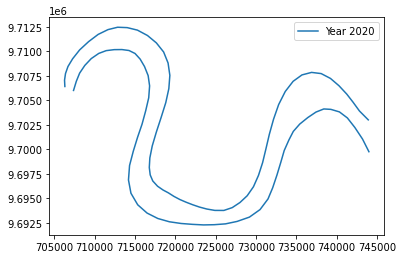

In [40]:
def River(t):
    t=t-2020
    widthinside=findwidth(east,north,east2,north2)
    widthoutside=findwidth(east2,north2,east,north)
    eastnew=east[1:len(east)-1]
    northnew=north[1:len(north)-1]
    xnorm=eastnew-centre(east,north)[:,0]
    ynorm=northnew-centre(east,north)[:,1]
    magnitude=np.sqrt(xnorm**2+ynorm**2)
    xnormunit=xnorm/magnitude
    ynormunit=ynorm/magnitude
    #eastnew=eastnew+t*4388*(np.sqrt(curve(east,north)))*xnormunit
    #northnew=northnew+t*4388*(np.sqrt(curve(east,north)))*ynormunit
    eastnew=eastnew+t*20*(np.sqrt(curve(east,north)*widthinside))*xnormunit
    northnew=northnew+t*20*(np.sqrt(curve(east,north)*widthinside))*ynormunit
    eastnew2=east2[1:len(east2)-1]
    northnew2=north2[1:len(north2)-1]
    xnorm2=eastnew2-centre(east2,north2)[:,0]
    ynorm2=northnew2-centre(east2,north2)[:,1]
    magnitude2=np.sqrt(xnorm2**2+ynorm2**2)
    xnormunit2=xnorm2/magnitude2
    ynormunit2=ynorm2/magnitude2
    #eastnew2=eastnew2+t*4383*(np.sqrt(curve(east2,north2)))*xnormunit2
    #northnew2=northnew2+t*4383*(np.sqrt(curve(east2,north2)))*ynormunit2
    eastnew2=eastnew2+t*20*(np.sqrt(curve(east2,north2)*widthoutside))*xnormunit2
    northnew2=northnew2+t*20*(np.sqrt(curve(east2,north2)*widthoutside))*ynormunit2
    eastmoved=np.empty(len(east))
    i=0
    while(i<len(east)):
        if(i==0):
            eastmoved[i]=east[0]
            j=0
        elif (i==len(east)-1):
            eastmoved[i]=east[len(east)-1]
        else:
            eastmoved[i]=eastnew[j]
            j+=1
        i+=1
    northmoved=np.empty(len(north))
    i=0
    while(i<len(north)):
        if(i==0):
            northmoved[i]=north[0]
            j=0
        elif (i==len(north)-1):
            northmoved[i]=north[len(north)-1]
        else:
            northmoved[i]=northnew[j]
            j+=1
        i+=1
    eastmoved2=np.empty(len(east2))
    i=0
    while(i<len(east2)):
        if(i==0):
            eastmoved2[i]=east2[0]
            j=0
        elif (i==len(east2)-2):
            eastmoved2[i]=east2[len(east2)-1]
        else:
            eastmoved2[i]=eastnew2[j]
            j+=1
        i+=1
    northmoved2=np.empty(len(north2))
    i=0
    while(i<len(north2)):
        if(i==0):
            northmoved2[i]=north2[0]
            j=0
        elif (i==len(north2)-1):
            northmoved2[i]=north2[len(north2)-1]
            j+=1
        else:
            northmoved2[i]=northnew2[j]
            j+=1
        i+=1    
    eastmoved2=smooth(eastmoved2,5)
    northmoved2=smooth(northmoved2,5)
    eastmoved=smooth(eastmoved,5)
    northmoved=smooth(northmoved,5)
    widthnew=findwidth(eastmoved,northmoved,eastmoved2,northmoved2)
    widthnewout=findwidth(eastmoved2,northmoved2,eastmoved,northmoved)
    i=0
    j=1
    count=0
    while(i<len(widthnew)):
        if(widthnew[i]<250):
            eastmovednew=(eastmoved[0:j-1])
            eastmovednew=np.append(eastmovednew,(eastmoved[len(eastmoved)-2]+eastmoved[j-1])/2)
            eastmovednew=smooth(np.append(eastmovednew,eastmoved[len(eastmoved)-2]),1)
            eastoxbow=eastmoved[j+3:len(eastmoved)-2]
            northmovednew=(northmoved[0:j-1])
            northmovednew=np.append(northmovednew,(northmoved[len(northmoved)-2]+northmoved[j-1])/2)
            northmovednew=smooth(np.append(northmovednew,northmoved[len(northmoved)-2]),1)
            northoxbow=northmoved[j+3:len(northmoved)-2]
            plt.figure()
            #plt.scatter(eastoxbow,northoxbow)
            p=plt.plot(eastmovednew,northmovednew,label='Year %d'%(t+2020))
            color=p[0].get_color()
            count+=1
            break
        i+=1
        j+=1
    i=0
    j=1
    while(i<len(widthnewout)):
        if(widthnewout[i]<250):
            eastmovednew2=(eastmoved2[0:j])
            eastmovednew2=np.append(eastmovednew2,(eastmoved2[len(eastmoved2)-2]+eastmoved2[len(eastmoved)-1])/2)
            eastmovednew2=smooth(np.append(eastmovednew2,eastmoved2[len(eastmoved2)-2]),1)
            eastoxbow2=eastmoved2[j+2:len(eastmoved2)-2]
            northmovednew2=northmoved2[0:j]
            northmovednew2=np.append(northmovednew2,(northmoved2[len(northmoved2)-2]+northmoved2[len(northmoved2)-1])/2)
            northmovednew2=smooth(np.append(northmovednew2,northmoved2[len(northmoved2)-2]),1)
            northoxbow2=northmoved2[j+2:len(northmoved2)-2]
           # plt.scatter(eastoxbow2,northoxbow2)
            plt.plot(eastmovednew2,northmovednew2,color=color)
            count+=1
            break
        i+=1
        j+=1
    if (count==0):
        p = plt.plot(eastmoved2,northmoved2,label='Year %d' %(t+2020))
        color = p[0].get_color()
        plt.plot(eastmoved,northmoved,color=color)
        plt.legend()
River(2020)

# Getting values of the points of the rivers for animation

In [41]:
def vals(t,index):
    widthinside=findwidth(east,north,east2,north2)
    widthoutside=findwidth(east2,north2,east,north)
    eastnew=east[1:len(east)-1]
    northnew=north[1:len(north)-1]
    xnorm=eastnew-centre(east,north)[:,0]
    ynorm=northnew-centre(east,north)[:,1]
    magnitude=np.sqrt(xnorm**2+ynorm**2)
    xnormunit=xnorm/magnitude
    ynormunit=ynorm/magnitude
    #eastnew=eastnew+t*4388*(np.sqrt(curve(east,north)))*xnormunit
    #northnew=northnew+t*4388*(np.sqrt(curve(east,north)))*ynormunit
    eastnew=eastnew+t*20*(np.sqrt(curve(east,north)*widthinside))*xnormunit
    northnew=northnew+t*20*(np.sqrt(curve(east,north)*widthinside))*ynormunit
    eastnew2=east2[1:len(east2)-1]
    northnew2=north2[1:len(north2)-1]
    xnorm2=eastnew2-centre(east2,north2)[:,0]
    ynorm2=northnew2-centre(east2,north2)[:,1]
    magnitude2=np.sqrt(xnorm2**2+ynorm2**2)
    xnormunit2=xnorm2/magnitude2
    ynormunit2=ynorm2/magnitude2
    #eastnew2=eastnew2+t*4383*(np.sqrt(curve(east2,north2)))*xnormunit2
    #northnew2=northnew2+t*4383*(np.sqrt(curve(east2,north2)))*ynormunit2
    eastnew2=eastnew2+t*20*(np.sqrt(curve(east2,north2)*widthoutside))*xnormunit2
    northnew2=northnew2+t*20*(np.sqrt(curve(east2,north2)*widthoutside))*ynormunit2
    eastmoved=np.empty(len(east))
    i=0
    while(i<len(east)):
        if(i==0):
            eastmoved[i]=east[0]
            j=0
        elif (i==len(east)-1):
            eastmoved[i]=east[len(east)-1]
        else:
            eastmoved[i]=eastnew[j]
            j+=1
        i+=1
    northmoved=np.empty(len(north))
    i=0
    while(i<len(north)):
        if(i==0):
            northmoved[i]=north[0]
            j=0
        elif (i==len(north)-1):
            northmoved[i]=north[len(north)-1]
        else:
            northmoved[i]=northnew[j]
            j+=1
        i+=1
    eastmoved2=np.empty(len(east2))
    i=0
    while(i<len(east2)):
        if(i==0):
            eastmoved2[i]=east2[0]
            j=0
        elif (i==len(east2)-2):
            eastmoved2[i]=east2[len(east2)-1]
        else:
            eastmoved2[i]=eastnew2[j]
            j+=1
        i+=1
    northmoved2=np.empty(len(north2))
    i=0
    while(i<len(north2)):
        if(i==0):
            northmoved2[i]=north2[0]
            j=0
        elif (i==len(north2)-1):
            northmoved2[i]=north2[len(north2)-1]
            j+=1
        else:
            northmoved2[i]=northnew2[j]
            j+=1
        i+=1    
    eastmoved2=smooth(eastmoved2,5)
    northmoved2=smooth(northmoved2,5)
    eastmoved=smooth(eastmoved,5)
    northmoved=smooth(northmoved,5)
    widthnew=findwidth(eastmoved,northmoved,eastmoved2,northmoved2)
    widthnewout=findwidth(eastmoved2,northmoved2,eastmoved,northmoved)
    i=0
    j=1
    count=0
    while(i<len(widthnew)):
        if(widthnew[i]<250):
            eastmovednew=(eastmoved[0:j-1])
            eastmovednew=np.append(eastmovednew,(eastmoved[len(eastmoved)-2]+eastmoved[j-1])/2)
            eastmovednew=smooth(np.append(eastmovednew,eastmoved[len(eastmoved)-2]),1)
            northmovednew=(northmoved[0:j-1])
            northmovednew=np.append(northmovednew,(northmoved[len(northmoved)-2]+northmoved[j-1])/2)
            northmovednew=smooth(np.append(northmovednew,northmoved[len(northmoved)-2]),1)
            count+=1
            if (index==2):
                return eastmovednew
            elif (index==3):
                return northmovednew
            break
        i+=1
        j+=1
    i=0
    j=1
    while(i<len(widthnewout)):
        if(widthnewout[i]<250):
            eastmovednew2=(eastmoved2[0:j])
            eastmovednew2=np.append(eastmovednew2,(eastmoved2[len(eastmoved2)-2]+eastmoved2[len(eastmoved)-1])/2)
            eastmovednew2=smooth(np.append(eastmovednew2,eastmoved2[len(eastmoved2)-2]),1)
            northmovednew2=northmoved2[0:j]
            northmovednew2=np.append(northmovednew2,(northmoved2[len(northmoved2)-2]+northmoved2[len(northmoved2)-1])/2)
            northmovednew2=smooth(np.append(northmovednew2,northmoved2[len(northmoved2)-2]),1)
            count+=1
            if(index==0):
                return eastmovednew2
            elif(index==1):
                return northmovednew2
            break
        i+=1
        j+=1
    if(count==0):
        if(index==0):
            return eastmoved2
        elif(index==1):
            return northmoved2
        elif(index==2):
            return eastmoved
        elif (index==3):
            return northmoved

# Animation

In [42]:
import random
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display 

import matplotlib.animation as anim
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

def change(timesteps):

    fig, ax = plt.subplots(figsize = (6,6))

    ax.set_aspect('equal')

    def animate(n): #Animation function
        while(n<len(timesteps)):
            t=timesteps[n]
            ax.cla() #Clear the previous plot to avoid the last river bank profile from sticking around
            ax.set_xlim(707000,741000) #Make it look nice
            ax.set_ylim(9690000,9720000)
            p=ax.plot(vals(t,0),vals(t,1),label='Year %d'%(t+2020)) #Plot the banks
            color = p[0].get_color()
            ax.plot(vals(t,2),vals(t,3),color=color) #Plot the banks
            plt.legend()
            plt.title('River Animation')
            return ax
    return anim.FuncAnimation(fig, animate,frames=list(range(0,8)), interval=500)


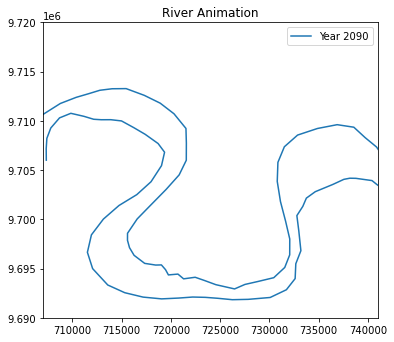

In [43]:
timesteps=np.array([0,10,20,30,40,50,60,70])
change(timesteps)
#animate.save('myanimation.gif')

In [44]:
import random
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.animation as anim
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

def change(timesteps):

    fig, ax = plt.subplots(figsize = (6,6))

    ax.set_aspect('equal')

    def animate(n): #Animation function
        while(n<len(timesteps)):
            t=timesteps[n]
            ax.cla() #Clear the previous plot to avoid the last river bank profile from sticking around
            ax.set_xlim(707000,739500) #Make it look nice
            ax.set_ylim(9690000,9720000)
            p=ax.plot(vals(t,0),vals(t,1),label='Year %d'%(t+2020)) #Plot the banks
            color = p[0].get_color()
            ax.plot(vals(t,2),vals(t,3),color=color) #Plot the banks
            plt.legend()
            plt.title('River Animation')
            return ax
    return anim.FuncAnimation(fig, animate,frames=list(range(0,7)), interval=500)


## Quick idea of how to handle it when data goes out of control after 100 years

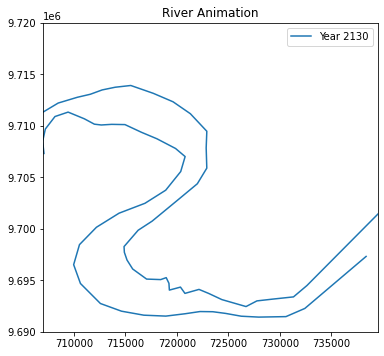

In [45]:
timesteps=np.array([50,60,70,80,90,100,110])
change(timesteps)
#animate.save('myanimation2.gif')